# Numeric optimization

To find the optimal weights of the logistic regression, we can use {prf:ref}`gradient descent <GD>` algorithm. To apply this algorithm, one need to calculate the gradient of the loss function.

## Binary logistic regression

Multiply the loss function {eq}`bin-log-reg-loss` by $n$:

$$
\mathcal L(\boldsymbol w) = 
-\sum\limits_{i=1}^n \big(y_i \log(\sigma(\boldsymbol x_i^\top \boldsymbol w)) + (1- y_i)\log(1 - \sigma(\boldsymbol x_i^\top \boldsymbol w))\big).
$$

To find $\nabla \mathcal L(\boldsymbol w)$ observe that

$$
   \nabla \log(\sigma(\boldsymbol x_i^\top \boldsymbol w)) = \frac {\nabla \sigma(\boldsymbol x_i^\top \boldsymbol w)}{\sigma(\boldsymbol x_i^\top \boldsymbol w)} = 
   \frac{\sigma'(\boldsymbol x_i^\top \boldsymbol w) \nabla(\boldsymbol x_i^\top \boldsymbol w)}{{\sigma(\boldsymbol x_i^\top \boldsymbol w)}}.
$$

Also,

$$
   \nabla \log(1 - \sigma(\boldsymbol x_i^\top \boldsymbol w)) = -\frac {\nabla  \sigma(\boldsymbol x_i^\top \boldsymbol w)}{1 - \sigma(\boldsymbol x_i^\top \boldsymbol w)} = 
   \frac{\sigma'(\boldsymbol x_i^\top \boldsymbol w) \nabla(\boldsymbol x_i^\top \boldsymbol w)}{{1 - \sigma(\boldsymbol x_i^\top \boldsymbol w)}}.
$$

**Q**. What is $\nabla(\boldsymbol x_i^\top \boldsymbol w)$?

Putting it altogeter, we get

$$
   \nabla \mathcal L(\boldsymbol w) = -\sum\limits_{i=1}^n \big(y_i(1 - \sigma(\boldsymbol x_i^\top \boldsymbol w))\boldsymbol x_i - (1-y_i)\sigma(\boldsymbol x_i^\top \boldsymbol w)\boldsymbol x_i\big) = \sum\limits_{i=1}^n (\sigma(\boldsymbol x_i^\top \boldsymbol w) - y_i)\boldsymbol x_i.
$$

````{admonition} Question
:class: important
How to write $\nabla \mathcal L(\boldsymbol w)$ as a product of a matrix and a vector, avoiding the explicit summation?

```{hint}
:class: dropdown
The shape of $\nabla \mathcal L(\boldsymbol w)$ is the same as of $\boldsymbol w$, i.e., $d\times 1$. Now observe that

$$
   \begin{pmatrix}
   \sigma(\boldsymbol x_1^\top \boldsymbol w) - y_1 \\
   \vdots \\
   \sigma(\boldsymbol x_n^\top \boldsymbol w) - y_n
   \end{pmatrix}
   = \sigma(\boldsymbol X \boldsymbol w )- \boldsymbol y \in \mathbb R^n.
$$

What should we multiply by this vector to obtain $\nabla \mathcal L$?
```
````

````{admonition} Question
:class: important
 What is hessian $\nabla^2 L(\boldsymbol w)$?

```{admonition} Answer
:class: tip, dropdown
$$
\nabla^2 L(\boldsymbol w) = \boldsymbol X^\top \boldsymbol S \boldsymbol X,
$$

where

$$
   \boldsymbol S = \mathrm{diag}\{\sigma(\boldsymbol X \boldsymbol w )- \boldsymbol y\} = \begin{pmatrix}
   \sigma(\boldsymbol x_1^{\boldsymbol{\top}} \boldsymbol w) - y_1  & \ldots & 0 \\
   \vdots & \ddots & \vdots \\
   0 & \ldots & \sigma(\boldsymbol x_n^{\boldsymbol{\top}} \boldsymbol w) - y_n
   \end{pmatrix}
$$
```
````

## Breast cancer dataset: numeric optimization 

Fetch the dataset:

In [310]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target
X.shape, y.shape

((569, 30), (569,))

Apply the {prf:ref}`gradient descent <GD>` algorithm to the logistic regression:

In [311]:
import numpy as np
from scipy.special import expit

def logistic_regression_gd(X, y, C=1, learning_rate=0.01, tol=1e-3, max_iter=10000):
    w = np.random.normal(size=X.shape[1])
    gradient = X.T.dot(expit(X.dot(w)) - y) + C * w
    for i in range(max_iter):
        if np.linalg.norm(gradient) <= tol:
            return w
        w -= learning_rate * gradient
        gradient = X.T.dot(X.dot(w) - y) + C * w
    print("max_iter exceeded")
    return w

Fit the logistic regresion on the whole dataset:

In [312]:
w = logistic_regression_gd(X, y, learning_rate=1e-9, max_iter=10**5)
w

max_iter exceeded


array([-1.05897982, -0.73455931, -0.224545  ,  0.02071242,  0.15849909,
        0.30102501,  0.62499961,  0.22536743, -0.11547831,  0.09846302,
        1.13105252, -0.81326191,  0.55806931, -0.01165263, -0.13070944,
        1.0180863 ,  0.67377564,  1.05699483, -0.97657422,  0.42808482,
        0.85158698,  0.43126131,  0.29269511, -0.02209398, -1.97426435,
       -0.20911212, -2.06213652,  1.91713595, -0.25573389, -1.68242716])

Calculate the accuracy score:

In [313]:
from sklearn.metrics import accuracy_score
accuracy_score(expit(X.dot(w)) > 0.5, y)

0.4938488576449912

Compare with `sklearn`:

In [314]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(fit_intercept=False, max_iter=5000)
log_reg.fit(X, y)
print(log_reg.score(X, y))
print(accuracy_score(log_reg.predict(X), y))
log_reg.coef_

0.9595782073813708
0.9595782073813708


array([[ 2.1975179 ,  0.11135549, -0.07305484, -0.00335447, -0.16745265,
        -0.41425964, -0.67991182, -0.36939821, -0.2430434 , -0.02410403,
        -0.02336256,  1.20717466,  0.04631705, -0.09649416, -0.01903567,
         0.01810195, -0.03747183, -0.04324005, -0.04367351,  0.00878879,
         1.29284173, -0.33773315, -0.12388807, -0.02474166, -0.31037867,
        -1.14588466, -1.63908301, -0.70741377, -0.73405013, -0.11303725]])

In [315]:
np.linalg.norm(w - log_reg.coef_)

6.154114933629059

## Multinomial logistic regression

Recall that the loss function in this case is

$$
    \begin{multline*}
    \mathcal L(\boldsymbol W) = -\sum\limits_{i=1}^n \sum\limits_{k=1}^K  y_{ik} \bigg(\boldsymbol x_i^\top\boldsymbol w_{k} -\log\Big(\sum\limits_{k=1}^K \exp(\boldsymbol x_i^\top\boldsymbol w_{k})\Big)\bigg) = \\
    =
    -\sum\limits_{i=1}^n \sum\limits_{k=1}^K  y_{ik} \bigg(\sum\limits_{j=1}^d x_{ij} w_{jk} -\log\Big(\sum\limits_{k=1}^K \exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)\Big)\bigg)
    \end{multline*}
$$

One can show that 

$$
    \nabla \mathcal L(\boldsymbol W) = \boldsymbol X^\top (\boldsymbol {\widehat Y} - \boldsymbol Y) = \boldsymbol X^\top ( \sigma(\boldsymbol{XW}) - \boldsymbol Y).
$$

<!-- Observe that

$$
    \frac{\partial}{\partial w_{pq}} (x_{ij} w_{jk}) = x_{ij} \delta_{pj} \delta_{qk},
$$

$$
\frac{\partial}{\partial w_{pq}}\bigg(\log\Big(\sum\limits_{k=1}^K \exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)\Big)\bigg) = \frac{\exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)}{\sum\limits_{k=1}^K \exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)} x_{ip} \delta_{qk}
$$

Hence, 

$$
    \frac{\partial \mathcal L}{\partial w_{pq}} = \sum\limits_{i=1}^n \sum\limits_{k=1}^K y_{ik}\bigg(\sum\limits_{j=1}^d  \bigg(  x_{ij} \delta_{pj} \delta_{qk} - \frac{\exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)}{\sum\limits_{k=1}^K \exp\Big(\sum\limits_{j=1}^d x_{ij} w_{jk}\Big)} x_{ip} \delta_{qk}\bigg)\bigg)
$$ -->

```{admonition} TODO
:class: warning
* Try numerical optimization on several datasets
* Apply Newton's method and compare it's performance with GD
```

## Gradient descent (GD)

In logistic regression, the goal is to find the optimal parameters $\beta$ that maximize the likelihood of the observed data. Gradient descent is an iterative optimization algorithm used to minimize the negative log-likelihood, which is equivalent to maximizing the likelihood.

The negative log-likelihood function for logistic regression is given by:

$$
   J(\beta) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\sigma(\mathbf{X}_i \cdot \beta)) + (1 - y_i) \log(1 - \sigma(\mathbf{X}_i \cdot \beta)) \right]
$$

where:
- $N$ is the number of observations.
- $\mathbf{X}_i$ is the feature vector for the i-th observation.
- $y_i$ is the binary target variable for the i-th observation.
- $\beta$ is the vector of parameters to be optimized.
- $\sigma(z)$ is the sigmoid function.

### Gradient Descent Update Rule

The gradient of the negative log-likelihood with respect to the parameter vector $\beta$ is the vector of partial derivatives, often referred to as the gradient vector:

$$ 
   \nabla J(\beta) = -\frac{1}{N} \sum_{i=1}^{N} \left[ (y_i - \sigma(\mathbf{X}_i \cdot \beta)) \cdot \mathbf{X}_i \right]
$$

The update rule for gradient descent is then given by:

$$ 
   \beta_{\text{new}} = \beta_{\text{old}} - \alpha \nabla J(\beta_{\text{old}})
$$

where:
- $\alpha$ is the learning rate, a hyperparameter controlling the step size of each iteration.

### GD Algorithm

Let $x_0$ - be the starting point of the gradient descent. Then we select each next point as follows:

$$ x_{k+1} = x_k - \alpha \nabla f(x_k), $$

where $\alpha$ – this is the step size (aka the learning rate). The general gradient descent algorithm is written very simply and elegantly:

```Python
x = normal(0, 1)                # you can try other types of initialization
repeat S times:                 # another variant: while abs(err) > tolerance
   h = grad_f(x)                # calculating the direction of descent
   x -= alpha * h               # updating the value at the point
```

There is a so-called steepest descent method: choose the step size so as to reduce the function as much as possible:

$$\alpha_k = \arg\min_{\alpha \geq 0} f(x_k - \alpha \nabla f(x_k)).$$

### Implementation

Let's implement a simple gradient descent for logistic regression in Python:

```python
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -1/m * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
    return cost

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    costs = []

    for _ in range(num_iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta = theta - learning_rate * gradient
        cost = compute_cost(theta, X, y)
        costs.append(cost)

    return theta, costs

# Example usage:
# Assuming X is your feature matrix and y is the target variable
# Add a column of ones to X for the bias term
X = np.column_stack((np.ones(m), X))
theta = np.zeros(X.shape[1])
learning_rate = 0.01
num_iterations = 1000

theta, costs = gradient_descent(X, y, theta, learning_rate, num_iterations)

## Cost function

An essential part of logistic regression is the logistic or sigmoid function. It has the following definition:

$$ \sigma(z) = \frac{1}{1 + e^{-z}} $$

where $ z $ represents the linear combination of the model's parameters and input features:

$$ z = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n $$

The coefficients that need to be learned in this case are $\beta_0, \beta_1, \ldots, \beta_n $.

The probability ($ P $) that an instance belongs to the positive class is predicted by the logistic regression model. The odds of a positive outcome are represented by the odds ratio ($ \frac{P}{1-P} $).

The log-odds or logit function is used to map the odds to a continuous range:

$$ \ln\left(\frac{P}{1-P}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n $$

The binary cross-entropy loss is a common way to represent the cost function in logistic regression. It is provided by: for a single training example.

$$ J(\theta) = -\left[y \log(\hat{y}) + (1-y) \log(1-\hat{y})\right] $$

where $ \hat{y} $ is the expected probability and $ y $ is the actual label (0 or 1).

The overall cost function for the full dataset with $ m $ training examples is the mean of the individual costs:

$$ J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\left[ y^{(i)}\log(\hat{y}^{(i)}) + (1-y^{(i)})\log(1-\hat{y}^{(i)}) \right] $$

Finding the parameter values ($ \beta $) that minimize the cost function is the aim of the training process. Numerical optimization techniques like gradient descent, Newton's method, or stochastic gradient descent are commonly used to accomplish this.

The cost function for logistic regression is defined as:

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))] $$

Here, $ J(\theta) $ is the cost function, $ m $ is the number of training examples, $ y^{(i)} $ is the actual output for the $ i^{th} $ example, $ h_\theta(x^{(i)}) $ is the predicted output, and $ \theta $ represents the parameters of the model.

### Implementation

```python
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -1/m * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
    return cost

# Example usage:
# Assuming X is your feature matrix and y is the target variable
# Add a column of ones to X for the bias term
X = np.column_stack((np.ones(m), X))
theta = np.zeros(X.shape[1])
cost = compute_cost(theta, X, y)

print("Initial cost:", cost)
```

## Executable content: Gradient Descent
 
Utilizing the <i><b>"load_digits"</b></i> dataset from the scikit-learn library, which comprises hand-written digit images, the objective is to predict the corresponding digit (ranging from 0 to 9) based on the pixel values. The subsequent example outlines the implementation of <b>Logistic Regression with Gradient Descent </b> for this dataset:

In [316]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Augmenting features with an intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing parameters for the logistic regression model using the gradient descent approach
theta = np.zeros((X.shape[1], len(np.unique(y))))  # Employing the one-vs-all strategy for multi-class classification

# Specifying hyperparameters
learning_rate = 0.01
epochs = 1000

# Executing the Gradient Descent optimization
for epoch in range(epochs):
    # Calculating softmax probabilities
    logits = np.dot(X_train, theta)
    probabilities = np.exp(logits) / np.sum(np.exp(logits), axis=1, keepdims=True)

    # Employing one-hot encoding for the target variable
    y_onehot = np.eye(len(np.unique(y)))[y_train]

    # Computing the gradient
    gradient = np.dot(X_train.T, (probabilities - y_onehot)) / len(y_train)

    # Updating model parameters
    theta -= learning_rate * gradient

# Generating predictions on the test set
logits_test = np.dot(X_test, theta)
predictions_test = np.argmax(logits_test, axis=1)

# Assessing the model's performance
accuracy = np.mean(predictions_test == y_test)
print(f"Accuracy on the test set: {accuracy}")

# Note: Visualizing the decision boundary is not practical in this high-dimensional feature space.

Accuracy on the test set: 0.9361111111111111


<i>This script modifies the logistic regression model to accommodate multi-class classification through the utilization of the one-vs-all strategy applied to the digits dataset. The script encompasses distinct phases, incorporating training, testing, and assessment procedures. It is imperative to acknowledge that the visualization of the decision boundary is rendered impractical within this expansive high-dimensional feature space.</i>

Visual representations serve as instrumental tools for elucidating nuanced aspects of model performance. The ensuing script represents an expanded iteration that incorporates visual depictions of the confusion matrix alongside illustrative examples of predicted outcomes:

Accuracy on the test set: 0.9666666666666667


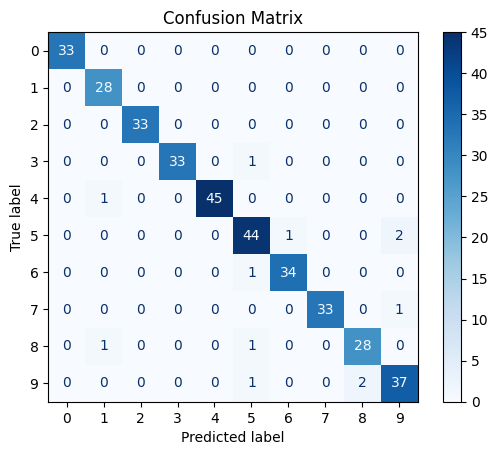

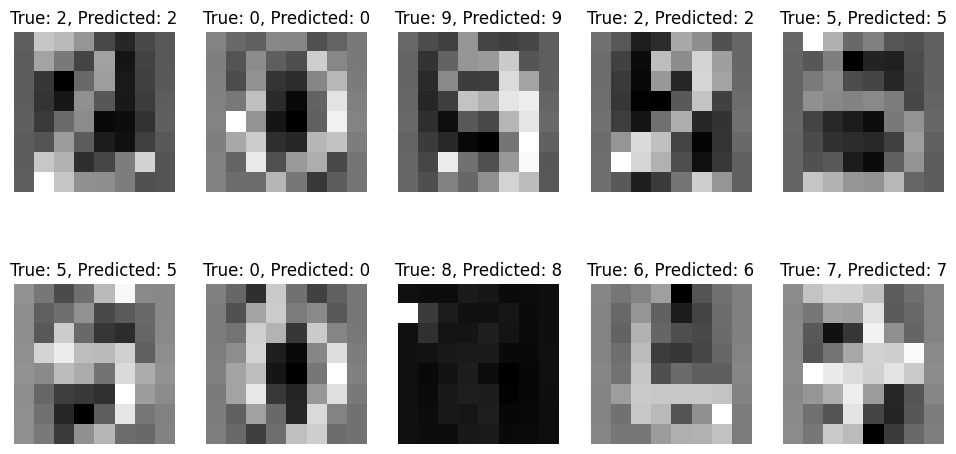

In [317]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Acquiring the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Augmenting features with an intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Segregating the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initiating logistic regression model
model = LogisticRegression(max_iter=1000, multi_class='ovr')  # 'ovr' for one-vs-rest strategy
model.fit(X_train, y_train)

# Deriving predictions on the test set
predictions_test = model.predict(X_test)

# Assessing the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy}")

# Visualizing the Confusion Matrix using ConfusionMatrixDisplay
conf_matrix = confusion_matrix(y_test, predictions_test)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Displaying sample predictions
sample_indices = np.random.choice(len(X_test), 10, replace=False)
sample_images = X_test[sample_indices, 1:]  # Excluding the intercept term for plotting
sample_labels = y_test[sample_indices]
predicted_labels_sample = predictions_test[sample_indices]

# Plotting sample predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(sample_images[i].reshape(8, 8), cmap='gray')
    ax.set_title(f"True: {sample_labels[i]}, Predicted: {predicted_labels_sample[i]}")
    ax.axis('off')

plt.show()

<i>The example below creates an interactive visualization using sliders to select the class for which you want to display the confusion matrix. Please ensure that you have the necessary dependencies installed (matplotlib, numpy, scikit-learn, ipywidgets). You can install ipywidgets using:<i>

```console 
pip install ipywidgets
jupyter nbextension enable --py widgetsnbextension
```

In [318]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from ipywidgets import interact, widgets

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term to X
X = np.c_[np.ones(X.shape[0]), X]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize logistic regression model
model = LogisticRegression(max_iter=1000, multi_class='ovr')  # 'ovr' for one-vs-rest strategy
model.fit(X_train, y_train)

# Make predictions on the test set
predictions_test = model.predict(X_test)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy}")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions_test)

# Function to plot confusion matrix for a specific class
def plot_confusion_matrix(class_idx):
    class_name = f'Class {class_idx}'
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y))
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix for {class_name}')

# Use ipywidgets interact to create a slider for class selection
interact(plot_confusion_matrix, class_idx=widgets.IntSlider(min=0, max=9, step=1, value=0))
plt.show()

Accuracy on the test set: 0.9666666666666667


interactive(children=(IntSlider(value=0, description='class_idx', max=9), Output()), _dom_classes=('widget-int…

## Newton's Method

The negative log-likelihood function for logistic regression is given by:

$$ 
    J(\beta) = -\frac{1}{N} \sum_{i=1}^{N} \left[ y_i \log(\sigma(\mathbf{X}_i \cdot \beta)) + (1 - y_i) \log(1 - \sigma(\mathbf{X}_i \cdot \beta)) \right]
$$

### Newton's Update Rule

The update rule for Newton's method is given by:

$$
    \beta_{\text{new}} = \beta_{\text{old}} - \left( H^{-1} \nabla J(\beta_{\text{old}}) \right)
$$

where:
- $H$ is the Hessian matrix, which is the second derivative of the negative log-likelihood function with respect to the parameters.
- $\nabla J(\beta)$ is the gradient vector, which is the first derivative of the negative log-likelihood function with respect to the parameters.

The Hessian matrix for logistic regression is given by:

$$
    H_{ij} = \frac{1}{N} \sum_{k=1}^{N} \sigma(\mathbf{X}_k \cdot \beta_{\text{old}}) \cdot (1 - \sigma(\mathbf{X}_k \cdot \beta_{\text{old}})) \cdot X_{ki} \cdot X_{kj}
$$


So, our task is to unconditionally optimize a smooth function

$$f(x) \to \min_{x \in \mathbb{R}^d}.$$

As with gradient descent optimization, we will look for the direction of functional reduction. But this time we will not use a linear approximation, but a quadratic one:

$$f(x + \Delta x) \approx f(x) + \langle \nabla f(x), \Delta x \rangle + \frac{1}{2}\langle \Delta x, B(x) \Delta x \rangle.$$

Taylor's formula tells us to take $B(x) = \nabla^2 f(x)$. By equating the gradient of this quadratic approximation to zero, we obtain the direction of descent for Newton's method:

$$\Delta x = [B(x)]^{-1} \nabla f(x).$$

Let 's denote $B_k = B(x_k), H_k = B_k^{-1}$. In this case, we can write down an iterative descent algorithm:

$$x_{k+1} = x_{k} - \alpha_k \cdot H_k \nabla f(x_k).$$

In the literature, the Newton method is called such a method at $\alpha_k = 1$, at a different step size $\alpha_k \in (0, 1)$, this method is called the damped Newton method.

### Implementation

Let's implement Newton's method for logistic regression in Python:

```Python
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = -1/m * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))
    return cost

def compute_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    gradient = np.dot(X.T, (h - y)) / m
    return gradient

def compute_hessian(theta, X):
    m = X.shape[0]
    h = sigmoid(np.dot(X, theta))
    Hessian = (X.T @ np.diag(h) @ np.diag(1 - h) @ X) / m
    return Hessian

def newtons_method(X, y, theta, num_iterations):
    for _ in range(num_iterations):
        gradient = compute_gradient(theta, X, y)
        Hessian = compute_hessian(theta, X)
        theta = theta - np.linalg.inv(Hessian) @ gradient

    return theta

# Example usage:
# Assuming X is your feature matrix and y is the target variable
# Add a column of ones to X for the bias term
X = np.column_stack((np.ones(m), X))
theta = np.zeros(X.shape[1])
num_iterations = 10

theta = newtons_method(X, y, theta, num_iterations)

## Executable content: Newton's Method

### Install necessary libraries used for interactiveness on graphs

1. pip install plotly

2. pip install ipywidgets

In this example, the code uses the breast cancer dataset and performs logistic regression optimized by Newton's Method:

In [319]:
import numpy as np
import pandas as pd
from sklearn import datasets
import plotly.graph_objects as go
import plotly.express as px
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

#loading breast cancer dataset
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(data=np.c_[cancer['data'], cancer['target']],
                         columns=np.concatenate([cancer['feature_names'], ['target']]))

#for visualization
features = ['mean radius', 'mean texture']
cancer_df['target'] = np.where(cancer_df['target'] == 0, 0, 1)

#data prep
X = cancer_df[features]
y = cancer_df['target']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#logistic regression model
model = LogisticRegression(solver='newton-cg')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

#plot decision boundry
def plot_decisionboundary(X, y, features):
    fig = go.Figure()

    for threshold in np.linspace(0.1, 0.9, 9):
        model = LogisticRegression()
        model.fit(X, y > threshold)
        y_pred = model.predict(X)

        trace = go.Scatter(x=X[:, 0], y=X[:, 1], mode='markers',
                           marker=dict(color=y_pred, colorscale='Viridis', size=10,
                                       line=dict(color='black', width=0.5)),
                           name=f'Threshold={threshold:.1f}')

        fig.add_trace(trace)

    fig.update_layout(title='Logistic Regression Decision Boundary with Slider',
                      xaxis=dict(title=features[0]),
                      yaxis=dict(title=features[1]),
                      sliders=[dict(steps=[dict(method='relayout',
                                                args=['shapes', []])],
                                    active=0,
                                    visible=True,
                                    x=0.1,
                                    y=0,
                                    len=0.9)])

    fig.show()



plot_decisionboundary(X_scaled, y, features)

# visualize confusion matrix 
def plot_confusionmatrix(X, y):
    fig = go.Figure()

    for threshold in np.linspace(0.1, 0.9, 9):
        model = LogisticRegression()
        model.fit(X, y > threshold)
        y_pred = model.predict(X)
        conf_matrix = confusion_matrix(y > threshold, y_pred)

        trace = go.Heatmap(z=conf_matrix, zmin=0, zmax=len(X), colorscale='Viridis',
                           x=['Predicted 0', 'Predicted 1'], y=['Actual 0', 'Actual 1'],
                           name=f'Threshold={threshold:.1f}')

        fig.add_trace(trace)

    fig.update_layout(title='Confusion Matrix with Slider',
                      xaxis=dict(title='Predicted Label'),
                      yaxis=dict(title='Actual Label'),
                      sliders=[dict(steps=[dict(method='relayout',
                                                args=['shapes', []])],
                                    active=0,
                                    visible=True,
                                    x=0.1,
                                    y=0,
                                    len=0.9)])

    fig.show()

plot_confusionmatrix(X_scaled, y)

Accuracy: 90.35%


In [320]:
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interactive
from sklearn.metrics import accuracy_score, roc_curve, auc

'''
# plot ROC curve 
def plot_roc_curve(X, y):
    thresholds = np.linspace(0.1, 0.9, 9)
    fig = go.Figure()

    for threshold in thresholds:
        model = LogisticRegression()
        model.fit(X, y > threshold)
        y_pred_prob = model.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, y_pred_prob)
        auc_value = auc(fpr, tpr)

        trace = go.Scatter(x=fpr, y=tpr, mode='lines',
                           name=f'Threshold={threshold:.1f}, AUC={auc_value:.2f}')

        fig.add_trace(trace)

    fig.update_layout(title='ROC Curve with Slider',
                      xaxis=dict(title='False Positive Rate'),
                      yaxis=dict(title='True Positive Rate'),
                      sliders=[dict(steps=[dict(method='relayout',
                                                args=['shapes', []])],
                                    active=0,
                                    visible=True,
                                    x=0.1,
                                    y=0,
                                    len=0.9)])

    fig.show()
'''

roc_curve_slider = widgets.FloatSlider(value=0.5, min=0.1, max=0.9, step=0.1, description='Threshold:')


def update_roc_curve(threshold):
    model.fit(X_scaled, y > threshold)
    y_pred_prob = model.predict_proba(X_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    auc_value = auc(fpr, tpr)

    fig = go.Figure()

    trace = go.Scatter(x=fpr, y=tpr, mode='lines',
                       name=f'Threshold={threshold:.1f}, AUC={auc_value:.2f}')

    fig.add_trace(trace)

    fig.update_layout(title='ROC Curve with Slider',
                      xaxis=dict(title='False Positive Rate'),
                      yaxis=dict(title='True Positive Rate'))

    fig.show()

# Create an interactive widget for the ROC curve with slider
interactive_plot_roc_curve = interactive(update_roc_curve, threshold=roc_curve_slider)

# Display the interactive plot
print("Adjust the threshold with the slider:")
interactive_plot_roc_curve

Adjust the threshold with the slider:


interactive(children=(FloatSlider(value=0.5, description='Threshold:', max=0.9, min=0.1), Output()), _dom_clas…

In [321]:
#3D decision boundary
def plot_3d_decision_boundary(X, y, features):
    thresholds = np.linspace(0.1, 0.9, 9)
    fig = go.Figure()

    for threshold in thresholds:
        model = LogisticRegression()
        model.fit(X, y > threshold)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        trace = go.Surface(x=xx, y=yy, z=Z, opacity=0.5, showscale=False,
                           colorscale='Viridis', name=f'Threshold={threshold:.1f}')

        fig.add_trace(trace)

    fig.update_layout(title='3D Decision Boundary with Slider',
                      scene=dict(xaxis_title=features[0],
                                 yaxis_title=features[1],
                                 zaxis_title='Predicted Label'),
                      sliders=[dict(steps=[dict(method='relayout',
                                                args=['scene.camera', dict(up=dict(z=0, x=0, y=0)),
                                                      'scene.annotations', []])],
                                    active=0,
                                    visible=True,
                                    x=0.1,
                                    y=0,
                                    len=0.9)])

    fig.show()

#slider
decision_boundary_slider = widgets.FloatSlider(value=0.5, min=0.1, max=0.9, step=0.1, description='Threshold:')


def update_3d_decision_boundary(threshold):
    model.fit(X_scaled, y > threshold)

    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig = go.Figure()

    trace = go.Surface(x=xx, y=yy, z=Z, opacity=0.5, showscale=False,
                       colorscale='Viridis', name=f'Threshold={threshold:.1f}')

    fig.add_trace(trace)

    fig.update_layout(title='3D Decision Boundary with Slider',
                      scene=dict(xaxis_title=features[0],
                                 yaxis_title=features[1],
                                 zaxis_title='Predicted Label'))

    fig.show()


interactive_plot_3d_decision_boundary = interactive(update_3d_decision_boundary, threshold=decision_boundary_slider)


print("Adjust the threshold with the slider:")
interactive_plot_3d_decision_boundary

Adjust the threshold with the slider:


interactive(children=(FloatSlider(value=0.5, description='Threshold:', max=0.9, min=0.1), Output()), _dom_clas…

## Evaluation and Comparison

To determine whether logistic regression models are useful for making predictions, it is essential to assess their performance. In logistic regression, evaluation and comparison entail determining how well the model performs as well as contrasting various models or variants of the same model. The following are typical techniques for assessing and contrasting logistic regression models:

### Metrics for Evaluation

#### Accuracy

A popular metric for balanced datasets, accuracy quantifies the percentage of correctly classified instances.

$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} $$

#### Precision, Recall, and F1 Score

F1 score, recall, and precision offer additional information for unbalanced datasets. They have the following definition:

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}} $$

$$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}} $$

$$ \text{F1 Score} = 2 \times \left(\frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}\right) $$

## Quizz

In [322]:
from jupyterquiz import display_quiz
import json
from base64 import b64encode

def get_spanned_encoded_q(q, q_name):
    byte_code = b64encode(bytes(json.dumps(q), 'utf8'))
    return f'<span style="display:none" id="{q_name}">{byte_code.decode()}</span>'

In [323]:
#Introduction to Logistic Regression
q_introduction_logistic_regression = [
    {
        "question": "What function serves as the foundation of logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "Sine function",
                "correct": False,
                "feedback": "Incorrect. The foundation of logistic regression is the logistic function or sigmoid function, not the sine function."
            },
            {
                "answer": "Logistic function (Sigmoid function)",
                "correct": True,
                "feedback": "Correct! Logistic regression is based on the logistic function, often referred to as the sigmoid function."
            },
            {
                "answer": "Exponential function",
                "correct": False,
                "feedback": "Incorrect. The key function in logistic regression is the logistic function, not the exponential function."
            },
            {
                "answer": "Linear function",
                "correct": False,
                "feedback": "Incorrect. Logistic regression is based on the logistic function, not a linear function."
            }
        ]
    },
    {
        "question": "If the linear combination of input characteristics and model parameters (z) in logistic regression is represented as z = β0 + β1X1 + β2X2 + ... + βnXn, what is the expression for the logistic function (σ(z))? Please provide your answer in a numeric form.",
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 1,
                "correct": True,
                "feedback": "Correct! The logistic function (σ(z)) is expressed as 1 / (1 + e^(-z)). In this case, it simplifies to 1 / (1 + e^(-1)), which is equal to approximately 0.731."
            },
            {
                "type": "default",
                "feedback": "Incorrect. Please review the logistic function (σ(z)) and try again."
            }
        ]
    }
]

# Display the questions
display_quiz(q_introduction_logistic_regression)

# Get the spanned encoded questions
get_spanned_encoded_q(q_introduction_logistic_regression, "q_introduction_logistic_regression")

<IPython.core.display.Javascript object>

'<span style="display:none" id="q_introduction_logistic_regression">W3sicXVlc3Rpb24iOiAiV2hhdCBmdW5jdGlvbiBzZXJ2ZXMgYXMgdGhlIGZvdW5kYXRpb24gb2YgbG9naXN0aWMgcmVncmVzc2lvbj8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIlNpbmUgZnVuY3Rpb24iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGUgZm91bmRhdGlvbiBvZiBsb2dpc3RpYyByZWdyZXNzaW9uIGlzIHRoZSBsb2dpc3RpYyBmdW5jdGlvbiBvciBzaWdtb2lkIGZ1bmN0aW9uLCBub3QgdGhlIHNpbmUgZnVuY3Rpb24uIn0sIHsiYW5zd2VyIjogIkxvZ2lzdGljIGZ1bmN0aW9uIChTaWdtb2lkIGZ1bmN0aW9uKSIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIExvZ2lzdGljIHJlZ3Jlc3Npb24gaXMgYmFzZWQgb24gdGhlIGxvZ2lzdGljIGZ1bmN0aW9uLCBvZnRlbiByZWZlcnJlZCB0byBhcyB0aGUgc2lnbW9pZCBmdW5jdGlvbi4ifSwgeyJhbnN3ZXIiOiAiRXhwb25lbnRpYWwgZnVuY3Rpb24iLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGUga2V5IGZ1bmN0aW9uIGluIGxvZ2lzdGljIHJlZ3Jlc3Npb24gaXMgdGhlIGxvZ2lzdGljIGZ1bmN0aW9uLCBub3QgdGhlIGV4cG9uZW50aWFsIGZ1bmN0aW9uLiJ9LCB7ImFuc3dlciI6ICJMaW5lYXIgZnVuY3Rpb24iLCAiY29ycmVj

In [324]:
# Cost Function in Logistic Regression
q_cost_function_logistic_regression = [
    {
        "question": "What is the foundational function of logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "Sine function",
                "correct": False,
                "feedback": "Incorrect. The foundation of logistic regression is the logistic function or sigmoid function, not the sine function."
            },
            {
                "answer": "Logistic function (Sigmoid function)",
                "correct": True,
                "feedback": "Correct! Logistic regression is based on the logistic function, often referred to as the sigmoid function."
            },
            {
                "answer": "Exponential function",
                "correct": False,
                "feedback": "Incorrect. The key function in logistic regression is the logistic function, not the exponential function."
            },
            {
                "answer": "Linear function",
                "correct": False,
                "feedback": "Incorrect. Logistic regression is based on the logistic function, not a linear function."
            }
        ]
    },
    {
        "question": "What is the purpose of the sigmoid function in logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "To model probability and odds",
                "correct": True,
                "feedback": "Correct! The sigmoid function is used to model the probability that an instance belongs to the positive class."
            },
            {
                "answer": "To perform linear regression",
                "correct": False,
                "feedback": "Incorrect. Logistic regression uses the sigmoid function for binary classification, not linear regression."
            },
            {
                "answer": "To calculate mean squared error",
                "correct": False,
                "feedback": "Incorrect. The sigmoid function is not used for calculating mean squared error in logistic regression."
            }
        ]
    },
    {
        "question": "What does the binary cross-entropy loss represent in logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "The cost function for a single training example",
                "correct": True,
                "feedback": "Correct! Binary cross-entropy loss represents the cost for a single training example in logistic regression."
            },
            {
                "answer": "The decision boundary",
                "correct": False,
                "feedback": "Incorrect. The binary cross-entropy loss is related to the cost function, not the decision boundary."
            },
            {
                "answer": "The log-odds function",
                "correct": False,
                "feedback": "Incorrect. The binary cross-entropy loss is a measure of the difference between predicted and actual labels."
            }
        ]
    }
]

# Display the questions
display_quiz(q_cost_function_logistic_regression)

# Get the spanned encoded questions
get_spanned_encoded_q(q_cost_function_logistic_regression, "q_cost_function_logistic_regression")

<IPython.core.display.Javascript object>

'<span style="display:none" id="q_cost_function_logistic_regression">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyB0aGUgZm91bmRhdGlvbmFsIGZ1bmN0aW9uIG9mIGxvZ2lzdGljIHJlZ3Jlc3Npb24/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJTaW5lIGZ1bmN0aW9uIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gVGhlIGZvdW5kYXRpb24gb2YgbG9naXN0aWMgcmVncmVzc2lvbiBpcyB0aGUgbG9naXN0aWMgZnVuY3Rpb24gb3Igc2lnbW9pZCBmdW5jdGlvbiwgbm90IHRoZSBzaW5lIGZ1bmN0aW9uLiJ9LCB7ImFuc3dlciI6ICJMb2dpc3RpYyBmdW5jdGlvbiAoU2lnbW9pZCBmdW5jdGlvbikiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISBMb2dpc3RpYyByZWdyZXNzaW9uIGlzIGJhc2VkIG9uIHRoZSBsb2dpc3RpYyBmdW5jdGlvbiwgb2Z0ZW4gcmVmZXJyZWQgdG8gYXMgdGhlIHNpZ21vaWQgZnVuY3Rpb24uIn0sIHsiYW5zd2VyIjogIkV4cG9uZW50aWFsIGZ1bmN0aW9uIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gVGhlIGtleSBmdW5jdGlvbiBpbiBsb2dpc3RpYyByZWdyZXNzaW9uIGlzIHRoZSBsb2dpc3RpYyBmdW5jdGlvbiwgbm90IHRoZSBleHBvbmVudGlhbCBmdW5jdGlvbi4ifSwgeyJhbnN3ZXIiOiAiTGluZWFyIGZ1bmN0aW9uIiwgImNvcnJlY3QiOiB

In [325]:
#Gradient Descent in Logistic Regression
q_gradient_descent_logistic_regression = [
    {
        "question": "What is the purpose of Gradient Descent in logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "To maximize the cost function",
                "correct": False,
                "feedback": "Incorrect. Gradient Descent aims to minimize the cost function."
            },
            {
                "answer": "To minimize the cost function",
                "correct": True,
                "feedback": "Correct! Gradient Descent is used to find optimal values that minimize the cost function."
            },
            {
                "answer": "To find the global maximum of the cost function",
                "correct": False,
                "feedback": "Incorrect. Gradient Descent searches for the global minimum of the cost function."
            },
            {
                "answer": "To perform feature scaling",
                "correct": False,
                "feedback": "Incorrect. Gradient Descent is focused on optimizing the parameters to minimize the cost function."
            }
        ]
    },
    {
        "question": "What does the learning rate control in Gradient Descent?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "The number of features",
                "correct": False,
                "feedback": "Incorrect. The learning rate regulates the step size during optimization."
            },
            {
                "answer": "The speed of convergence",
                "correct": True,
                "feedback": "Correct! The learning rate influences how quickly the algorithm converges."
            },
            {
                "answer": "The size of the dataset",
                "correct": False,
                "feedback": "Incorrect. The learning rate is independent of the dataset size."
            },
            {
                "answer": "The number of iterations",
                "correct": False,
                "feedback": "Incorrect. The learning rate does not control the number of iterations."
            }
        ]
    },
    {
        "question": "What is Batch Gradient Descent?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "It updates parameters using a random subset of the training data.",
                "correct": False,
                "feedback": "Incorrect. This describes Mini-Batch Gradient Descent."
            },
            {
                "answer": "It computes the gradient using the complete training dataset.",
                "correct": True,
                "feedback": "Correct! Batch Gradient Descent uses the entire training dataset for each iteration."
            },
            {
                "answer": "It updates parameters separately for every training example.",
                "correct": False,
                "feedback": "Incorrect. This describes Stochastic Gradient Descent (SGD)."
            },
            {
                "answer": "It only updates parameters once at the end of training.",
                "correct": False,
                "feedback": "Incorrect. Batch Gradient Descent updates parameters in each iteration."
            }
        ]
    }
]

# Display the questions
display_quiz(q_gradient_descent_logistic_regression)

# Get the spanned encoded questions
get_spanned_encoded_q(q_cost_function_logistic_regression, "q_cost_function_logistic_regression")

<IPython.core.display.Javascript object>

'<span style="display:none" id="q_cost_function_logistic_regression">W3sicXVlc3Rpb24iOiAiV2hhdCBpcyB0aGUgZm91bmRhdGlvbmFsIGZ1bmN0aW9uIG9mIGxvZ2lzdGljIHJlZ3Jlc3Npb24/IiwgInR5cGUiOiAibWFueV9jaG9pY2UiLCAiYW5zd2VycyI6IFt7ImFuc3dlciI6ICJTaW5lIGZ1bmN0aW9uIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gVGhlIGZvdW5kYXRpb24gb2YgbG9naXN0aWMgcmVncmVzc2lvbiBpcyB0aGUgbG9naXN0aWMgZnVuY3Rpb24gb3Igc2lnbW9pZCBmdW5jdGlvbiwgbm90IHRoZSBzaW5lIGZ1bmN0aW9uLiJ9LCB7ImFuc3dlciI6ICJMb2dpc3RpYyBmdW5jdGlvbiAoU2lnbW9pZCBmdW5jdGlvbikiLCAiY29ycmVjdCI6IHRydWUsICJmZWVkYmFjayI6ICJDb3JyZWN0ISBMb2dpc3RpYyByZWdyZXNzaW9uIGlzIGJhc2VkIG9uIHRoZSBsb2dpc3RpYyBmdW5jdGlvbiwgb2Z0ZW4gcmVmZXJyZWQgdG8gYXMgdGhlIHNpZ21vaWQgZnVuY3Rpb24uIn0sIHsiYW5zd2VyIjogIkV4cG9uZW50aWFsIGZ1bmN0aW9uIiwgImNvcnJlY3QiOiBmYWxzZSwgImZlZWRiYWNrIjogIkluY29ycmVjdC4gVGhlIGtleSBmdW5jdGlvbiBpbiBsb2dpc3RpYyByZWdyZXNzaW9uIGlzIHRoZSBsb2dpc3RpYyBmdW5jdGlvbiwgbm90IHRoZSBleHBvbmVudGlhbCBmdW5jdGlvbi4ifSwgeyJhbnN3ZXIiOiAiTGluZWFyIGZ1bmN0aW9uIiwgImNvcnJlY3QiOiB

In [326]:
# Newton’s Method in Logistic Regression
q_newtons_method_logistic_regression = [
    {
        "question": "In the context of Newton's Method for logistic regression, if the Hessian matrix is a 3x3 matrix, how many second-order partial derivatives are involved?",
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 6,
                "correct": True,
                "feedback": "Correct! In a 3x3 Hessian matrix, there are 6 second-order partial derivatives."
            },
            {
                "type": "range",
                "range": [0, 5],
                "correct": False,
                "feedback": "Incorrect. The number of second-order partial derivatives in a 3x3 Hessian matrix is greater than the specified range."
            },
            {
                "type": "value",
                "value": 9,
                "correct": False,
                "feedback": "Incorrect. The number of second-order partial derivatives is not equal to the square of the matrix dimension."
            },
            {
                "type": "default",
                "feedback": "Please provide a numerical answer."
            }
        ]
    },
    {
        "question": "What is the primary objective of Newton's Method in logistic regression optimization?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "To maximize the cost function",
                "correct": False,
                "feedback": "Incorrect. Newton's Method aims to minimize the cost function."
            },
            {
                "answer": "To minimize the cost function",
                "correct": True,
                "feedback": "Correct! Newton's Method is used for fast convergence in minimizing the cost function."
            },
            {
                "answer": "To find the global maximum of the cost function",
                "correct": False,
                "feedback": "Incorrect. Newton's Method searches for the global minimum of the cost function."
            },
            {
                "answer": "To perform feature scaling",
                "correct": False,
                "feedback": "Incorrect. Newton's Method is focused on optimizing parameters, not feature scaling."
            }
        ]
    },
    {
        "question": "What does the Hessian matrix represent in Newton's Method for logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "The cost function",
                "correct": False,
                "feedback": "Incorrect. The Hessian matrix is related to the curvature of the cost function."
            },
            {
                "answer": "The second-order partial derivatives of the cost function",
                "correct": True,
                "feedback": "Correct! The Hessian matrix involves second-order partial derivatives of the cost function."
            },
            {
                "answer": "The gradient of the cost function",
                "correct": False,
                "feedback": "Incorrect. The gradient is different from the Hessian matrix in Newton's Method."
            },
            {
                "answer": "The feature vectors",
                "correct": False,
                "feedback": "Incorrect. The Hessian matrix is not related to feature vectors in this context."
            }
        ]
    },
    {
        "question": "How does Newton's Method update the parameters in logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "Using the first-order partial derivatives",
                "correct": False,
                "feedback": "Incorrect. Newton's Method involves second-order partial derivatives for updating parameters."
            },
            {
                "answer": "By directly modifying the learning rate",
                "correct": False,
                "feedback": "Incorrect. Newton's Method does not directly modify the learning rate like gradient descent."
            },
            {
                "answer": "Using the inverse of the Hessian matrix and the cost function's gradient",
                "correct": True,
                "feedback": "Correct! Newton's Method uses both the Hessian matrix and the gradient for parameter updates."
            },
            {
                "answer": "By performing stochastic updates on the parameters",
                "correct": False,
                "feedback": "Incorrect. Stochastic updates are more typical in techniques like stochastic gradient descent, not Newton's Method."
            }
        ]
    }
]

# Display the questions
display_quiz(q_newtons_method_logistic_regression)

# Get the spanned encoded questions
get_spanned_encoded_q(q_newtons_method_logistic_regression, "q_newtons_method_logistic_regression")

<IPython.core.display.Javascript object>

'<span style="display:none" id="q_newtons_method_logistic_regression">W3sicXVlc3Rpb24iOiAiSW4gdGhlIGNvbnRleHQgb2YgTmV3dG9uJ3MgTWV0aG9kIGZvciBsb2dpc3RpYyByZWdyZXNzaW9uLCBpZiB0aGUgSGVzc2lhbiBtYXRyaXggaXMgYSAzeDMgbWF0cml4LCBob3cgbWFueSBzZWNvbmQtb3JkZXIgcGFydGlhbCBkZXJpdmF0aXZlcyBhcmUgaW52b2x2ZWQ/IiwgInR5cGUiOiAibnVtZXJpYyIsICJhbnN3ZXJzIjogW3sidHlwZSI6ICJ2YWx1ZSIsICJ2YWx1ZSI6IDYsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIEluIGEgM3gzIEhlc3NpYW4gbWF0cml4LCB0aGVyZSBhcmUgNiBzZWNvbmQtb3JkZXIgcGFydGlhbCBkZXJpdmF0aXZlcy4ifSwgeyJ0eXBlIjogInJhbmdlIiwgInJhbmdlIjogWzAsIDVdLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGUgbnVtYmVyIG9mIHNlY29uZC1vcmRlciBwYXJ0aWFsIGRlcml2YXRpdmVzIGluIGEgM3gzIEhlc3NpYW4gbWF0cml4IGlzIGdyZWF0ZXIgdGhhbiB0aGUgc3BlY2lmaWVkIHJhbmdlLiJ9LCB7InR5cGUiOiAidmFsdWUiLCAidmFsdWUiOiA5LCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGUgbnVtYmVyIG9mIHNlY29uZC1vcmRlciBwYXJ0aWFsIGRlcml2YXRpdmVzIGlzIG5vdCBlcXVhbCB0byB0aGUgc3F1YXJlIG9mIHRoZSBtYXRyaXggZGltZW

In [327]:
#Evaluation and Comparison in Logistic Regression

q_evaluation_comparison_logistic_regression = [
    {
        "question": "What does the Accuracy metric in logistic regression evaluate?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "The percentage of correctly classified instances",
                "correct": True,
                "feedback": "Correct! Accuracy measures the percentage of correctly classified instances."
            },
            {
                "answer": "The ratio of true positives to the total number of predictions",
                "correct": False,
                "feedback": "Incorrect. This description corresponds more closely to precision."
            },
            {
                "answer": "The ratio of true positives to the sum of true positives and false negatives",
                "correct": False,
                "feedback": "Incorrect. This description corresponds to recall, not accuracy."
            },
            {
                "answer": "The harmonic mean of precision and recall",
                "correct": False,
                "feedback": "Incorrect. This description refers to the F1 Score, not accuracy."
            }
        ]
    },
    {
        "question": "How is Precision defined in logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "True Positives / (True Positives + False Positives)",
                "correct": True,
                "feedback": "Correct! Precision is calculated as True Positives divided by the sum of True Positives and False Positives."
            },
            {
                "answer": "True Positives / (True Positives + False Negatives)",
                "correct": False,
                "feedback": "Incorrect. This formula corresponds to recall, not precision."
            },
            {
                "answer": "The harmonic mean of precision and recall",
                "correct": False,
                "feedback": "Incorrect. This description corresponds to the F1 Score, not precision."
            },
            {
                "answer": "The percentage of correctly classified instances",
                "correct": False,
                "feedback": "Incorrect. This description refers to accuracy, not precision."
            }
        ]
    },
    {
        "question": "What is the F1 Score in logistic regression?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "The percentage of correctly classified instances",
                "correct": False,
                "feedback": "Incorrect. This description refers to accuracy, not the F1 Score."
            },
            {
                "answer": "The ratio of true positives to the total number of predictions",
                "correct": False,
                "feedback": "Incorrect. This description corresponds more closely to precision."
            },
            {
                "answer": "The harmonic mean of precision and recall",
                "correct": True,
                "feedback": "Correct! The F1 Score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance on unbalanced datasets."
            },
            {
                "answer": "The ratio of true positives to the sum of true positives and false negatives",
                "correct": False,
                "feedback": "Incorrect. This description corresponds to recall, not the F1 Score."
            }
        ]
    },
    {
        "question": "In logistic regression, what does Recall measure?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "The percentage of correctly classified instances",
                "correct": False,
                "feedback": "Incorrect. This description refers to accuracy, not recall."
            },
            {
                "answer": "True Positives / (True Positives + False Positives)",
                "correct": False,
                "feedback": "Incorrect. This formula corresponds to precision, not recall."
            },
            {
                "answer": "The ratio of true positives to the sum of true positives and false negatives",
                "correct": True,
                "feedback": "Correct! Recall measures the ability of a model to capture all positive instances."
            },
            {
                "answer": "The harmonic mean of precision and recall",
                "correct": False,
                "feedback": "Incorrect. This description refers to the F1 Score, not recall."
            }
        ]
    }
]

# Display the questions
display_quiz(q_evaluation_comparison_logistic_regression)

# Get the spanned encoded questions
get_spanned_encoded_q(q_evaluation_comparison_logistic_regression, "q_evaluation_comparison_logistic_regression")

<IPython.core.display.Javascript object>

'<span style="display:none" id="q_evaluation_comparison_logistic_regression">W3sicXVlc3Rpb24iOiAiV2hhdCBkb2VzIHRoZSBBY2N1cmFjeSBtZXRyaWMgaW4gbG9naXN0aWMgcmVncmVzc2lvbiBldmFsdWF0ZT8iLCAidHlwZSI6ICJtYW55X2Nob2ljZSIsICJhbnN3ZXJzIjogW3siYW5zd2VyIjogIlRoZSBwZXJjZW50YWdlIG9mIGNvcnJlY3RseSBjbGFzc2lmaWVkIGluc3RhbmNlcyIsICJjb3JyZWN0IjogdHJ1ZSwgImZlZWRiYWNrIjogIkNvcnJlY3QhIEFjY3VyYWN5IG1lYXN1cmVzIHRoZSBwZXJjZW50YWdlIG9mIGNvcnJlY3RseSBjbGFzc2lmaWVkIGluc3RhbmNlcy4ifSwgeyJhbnN3ZXIiOiAiVGhlIHJhdGlvIG9mIHRydWUgcG9zaXRpdmVzIHRvIHRoZSB0b3RhbCBudW1iZXIgb2YgcHJlZGljdGlvbnMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGlzIGRlc2NyaXB0aW9uIGNvcnJlc3BvbmRzIG1vcmUgY2xvc2VseSB0byBwcmVjaXNpb24uIn0sIHsiYW5zd2VyIjogIlRoZSByYXRpbyBvZiB0cnVlIHBvc2l0aXZlcyB0byB0aGUgc3VtIG9mIHRydWUgcG9zaXRpdmVzIGFuZCBmYWxzZSBuZWdhdGl2ZXMiLCAiY29ycmVjdCI6IGZhbHNlLCAiZmVlZGJhY2siOiAiSW5jb3JyZWN0LiBUaGlzIGRlc2NyaXB0aW9uIGNvcnJlc3BvbmRzIHRvIHJlY2FsbCwgbm90IGFjY3VyYWN5LiJ9LCB7ImFuc3dlciI6ICJUaGUgaGFybW9uaWMgbWVhbiBvZiBwcmV